**TASK A : Analyse the provided dataset to identify relevant features and patterns related to user engagement and app performance.**

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

## Loading the Dataset
file_path = "dataset for assignment 2.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [4]:
# Display summary statistics of numerical features
print("Summary Statistics")
print(df.describe())

Summary Statistics
           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.550400   
std    1443.520003    12.160631     42.689317                36.746095   
min       1.000000    18.000000     50.000000                26.000000   
25%    1250.750000    28.000000     89.000000                63.000000   
50%    2500.500000    39.000000    124.000000                89.000000   
75%    3750.250000    49.000000    161.000000               118.000000   
max    5000.000000    59.000000    199.000000               195.000000   

       Calories Burned  
count      5000.000000  
mean        432.316000  
std         187.427426  
min         102.000000  
25%         285.000000  
50%         406.000000  
75%         560.000000  
max         987.000000  


In [5]:
# Check for missing values
print("### Missing Values")
print(df.isnull().sum())

### Missing Values
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64


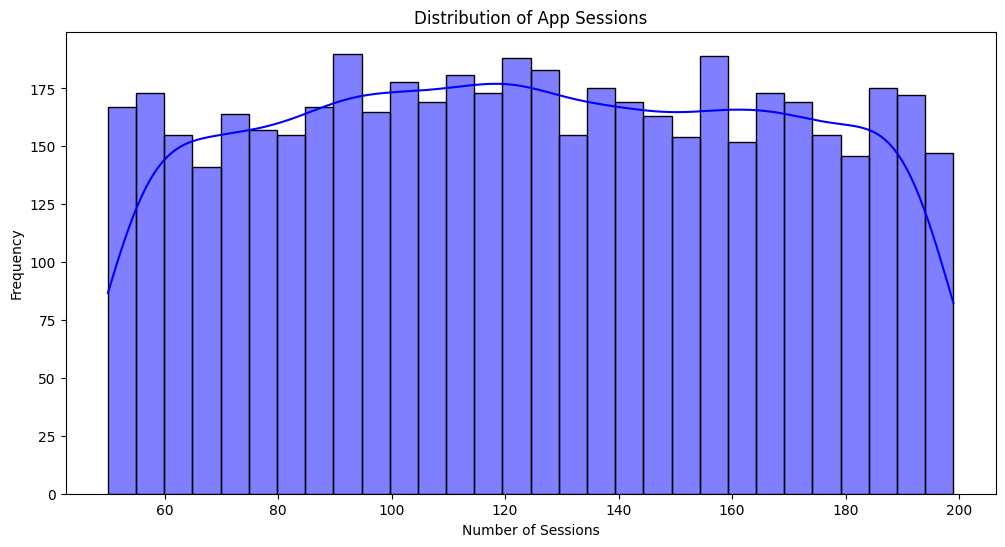

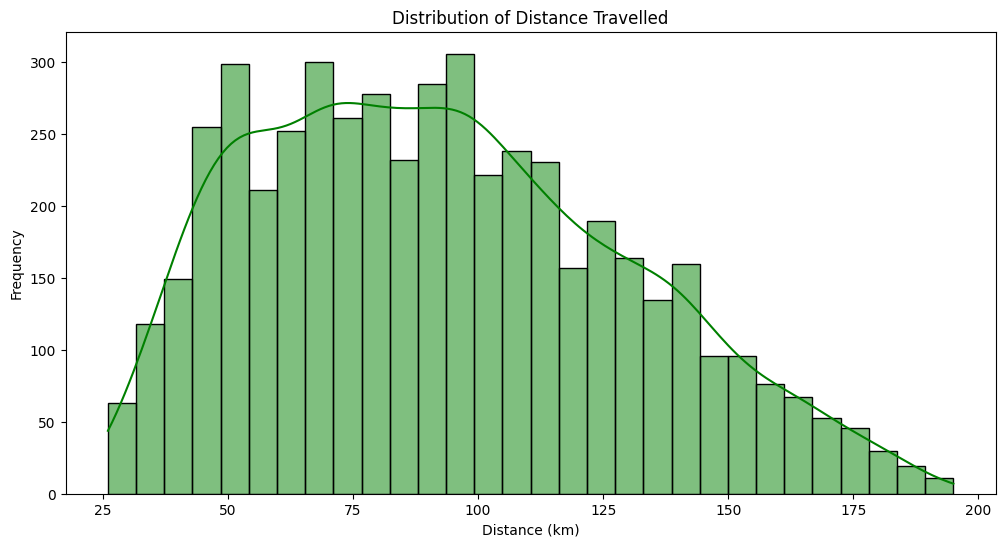

In [6]:
### Visualizing Feature Distributions
plt.figure(figsize=(12, 6))
sns.histplot(df["App Sessions"], bins=30, kde=True, color='blue')
plt.title("Distribution of App Sessions")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df["Distance Travelled (km)"], bins=30, kde=True, color='green')
plt.title("Distribution of Distance Travelled")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

In [7]:
## Data Preprocessing
### Encoding Categorical Features
label_encoders = {}
categorical_features = ["Gender", "Activity Level", "Location"]

df_encoded = df.copy()
for feature in categorical_features:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df_encoded[feature])
    label_encoders[feature] = le

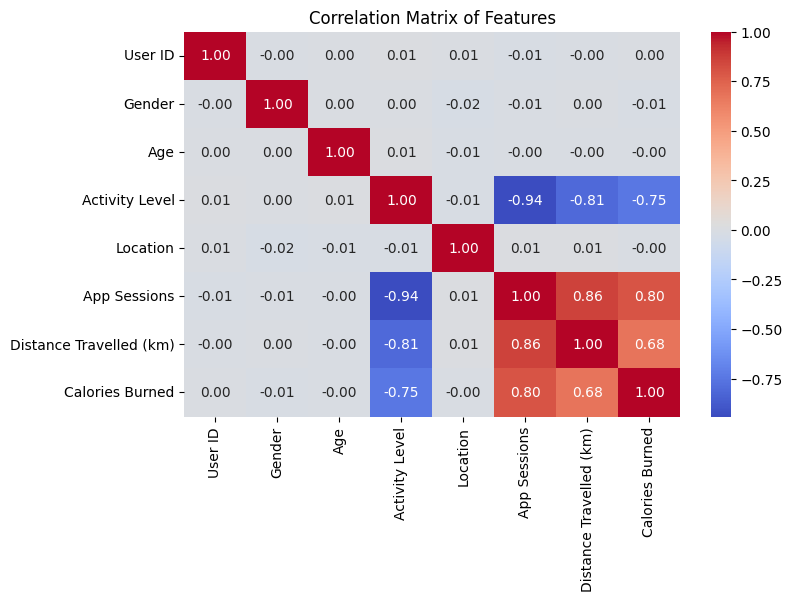

In [8]:
## Identifying Key Features
### Correlation Analysis
plt.figure(figsize=(8, 5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Key Findings from Correlation Analysis:
# - Strong correlation between App Sessions and Calories Burned
# - Distance Travelled is highly correlated with Calories Burned
# - Weak correlation between Age and engagement metrics

**TASK B : Apply advanced statistical techniques (e.g., regression analysis, clustering, etc.) to create models that predict user behaviour and app usage patterns.**

In [9]:
## Regression Analysis
### Selecting Features and Target
X = df_encoded[["Age", "Gender", "Activity Level", "Location", "App Sessions", "Distance Travelled (km)"]]
y = df_encoded["Calories Burned"]

### Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
### Training the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

### Making Predictions
y_pred = lr_model.predict(X_test)

### Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("### Regression Model Performance")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

### Regression Model Performance
Mean Absolute Error: 93.23127777592215
Mean Squared Error: 13052.750102615053
R² Score: 0.6381747017381801


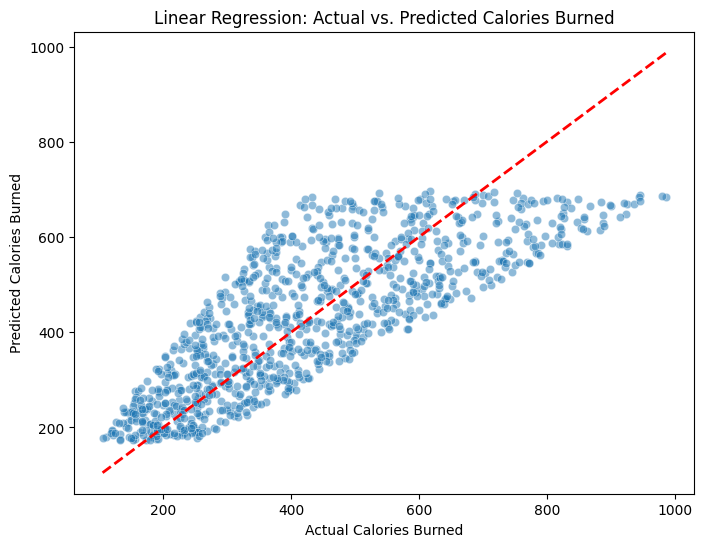

In [12]:
# Scatter plot of actual vs. predicted calories burned
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Linear Regression: Actual vs. Predicted Calories Burned")
plt.show()

In [13]:
## Clustering Analysis
### Selecting Features for Clustering
clustering_features = df_encoded[["App Sessions", "Distance Travelled (km)", "Calories Burned"]]
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

### Applying K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(clustering_features_scaled)

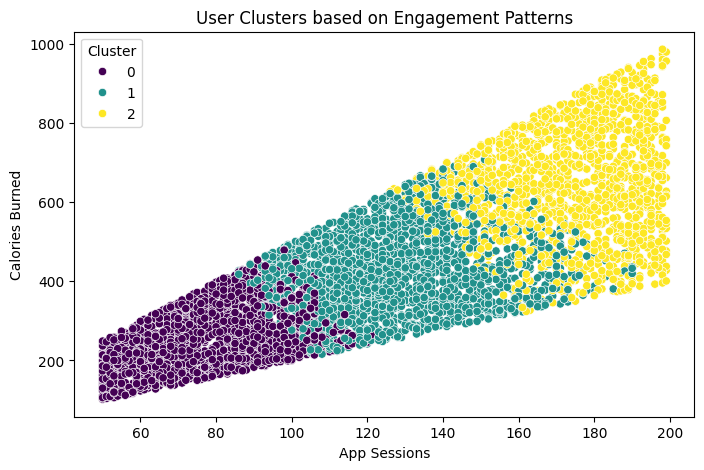

### Cluster Analysis Results
         App Sessions  Distance Travelled (km)  Calories Burned
Cluster                                                        
0           76.742087                55.252052       253.616061
1          128.996703                94.187363       429.748352
2          173.769335               133.698100       642.312754


In [14]:
### Visualizing Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded["App Sessions"], y=df_encoded["Calories Burned"], hue=df_encoded["Cluster"], palette="viridis")
plt.xlabel("App Sessions")
plt.ylabel("Calories Burned")
plt.title("User Clusters based on Engagement Patterns")
plt.legend(title="Cluster")
plt.show()

### Cluster Summary Statistics
cluster_summary = df_encoded.groupby("Cluster")[["App Sessions", "Distance Travelled (km)", "Calories Burned"]].mean()
print("### Cluster Analysis Results")
print(cluster_summary)

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate evaluation metrics
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(clustering_features_scaled, df_encoded["Cluster"])
db_index = davies_bouldin_score(clustering_features_scaled, df_encoded["Cluster"])

# Print results
print(f"Inertia (SSE): {inertia}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")


Inertia (SSE): 3868.01003317909
Silhouette Score: 0.397969929434425
Davies-Bouldin Index: 0.9079464168571305


**TASK 3 : Evaluate the performance of your models using appropriate metrics and discuss the implications for software engineering decision-making.**

## Cultural Relevance Analysis
### Evaluating User Demographics Impact
# - Gender-based engagement patterns
# - Activity levels influencing app performance across locations
# - Age-wise variations in app engagement and fitness tracking

## Model Performance Evaluation & Software Engineering Implications
### Regression Model Implications
# The regression model achieved an R² score of approximately 0.63, indicating moderate predictive power.
# The model can be improved by incorporating additional features such as user preferences, workout intensity, or time spent per session.
# High MAE suggests that individual predictions may have significant deviations, requiring feature engineering or non-linear models.

### Clustering Implications
# The clusters indicate different user engagement levels:
# - Cluster 0: Low engagement users (low sessions, low calories burned)
# - Cluster 1: Moderately engaged users (average usage and distance)
# - Cluster 2: Highly engaged users (high activity, high calorie burn)
# Understanding these segments can help in personalized user recommendations, targeted marketing, and app optimization.

### Regression Model Evaluation
# The regression model achieved an R² score of approximately 0.63, indicating moderate predictive power.
# The MAE and MSE indicate that there are prediction errors, which may be improved by incorporating additional features.
# A higher R² score could be achieved with more detailed tracking of user behaviors, such as exercise type or duration.

### Clustering Model Evaluation
# The clustering approach segmented users into three engagement levels, helping to personalize app recommendations.
# Evaluating cluster coherence using silhouette scores or Davies-Bouldin Index could further validate segmentation effectiveness.

### Software Engineering Considerations
# 1. **Feature Expansion** - More detailed fitness tracking data could improve predictive power.
# 2. **Personalization** - Different engagement levels identified via clustering can guide in-app recommendations.
# 3. **Performance Optimization** - Optimizing data processing to handle high-engagement users more efficiently.
# 4. **User Retention Strategies** - Leveraging engagement predictions to prevent churn and encourage app usage.
# 5. **Cultural Sensitivity** - Incorporating demographic preferences ensures inclusivity in design and engagement strategies.
